In [1]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [4]:
num_frames = 50

images = loadVideo("dataset/2011_09_26", num_frames)

In [37]:
images = cropImages(images )

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  50
Cropped Image size:  (120, 100)


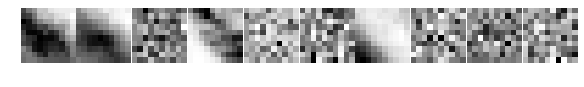

In [39]:
patch_size = 10
num_samples = 100
num_features = 10
    
# features = generatePCADictionary(images, patch_size, num_samples, num_features)
features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)

plotDictionary(features)

In [40]:
# Reconstructed image
k = 1000
S_code = orthogonalMatchingPursuit(images[0], features, k)

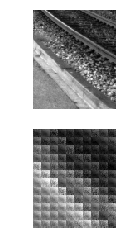

Unique Codes:  1000
436


In [41]:
recon_image = generateReconImage(S_code, images[0], features)

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.imshow(images[0], cmap="Greys_r")
ax1.axis("off")

ax2.imshow(recon_image, cmap="Greys_r")
ax2.axis("off")

plt.show()

print("Unique Codes: ", len(set(S_code)))
l = []
for s in S_code:
    l.append(s[:2])
print(len(set(l)))

In [57]:
# Testing Convolutional Pursuit
# Reconstructed image
k = 40
S_code = convolutionalMatchingPursuit(images[0], features, k)

/home/luke/projects/CS6140-MatchingPursuit/utils/matching_pursuit.py:64: RuntimeWarning: overflow encountered in subtract
  image_float -= convolved_features[best_feature_ind]


In [58]:
print(S_code)

[(0, 462.435076523249), (0, 4946.376381845758), (0, 53173.63410345335), (0, 573173.9111892714), (0, 6189134.12605033), (0, 66910649.891838126), (0, 724005153.9909005), (0, 7839290607.7401085), (0, 84925213702.58167), (0, 920397081097.6365), (0, 9978338023868.352), (0, 108207996695098.16), (0, 1173702857022594.2), (0, 1.2733221296553788e+16), (0, 1.3816132636151974e+17), (0, 1.4993115959453228e+18), (0, 1.62721687912768e+19), (0, 1.7661983648910243e+20), (0, 1.9172003895048536e+21), (0, 2.0812484985201917e+22), (0, 2.259456116753784e+23), (0, 2.453031817834916e+24), (0, 2.663287209771555e+25), (0, 2.8916454962176567e+26), (0, 3.1396507638703277e+27), (0, 3.408978039008744e+28), (0, 3.7014441959022346e+29), (0, 4.0190197476106193e+30), (0, 4.363841637825752e+31), (0, 4.738227067591394e+32), (0, 5.144688460600292e+33), (0, 5.585949674801357e+34), (0, 6.0649635105892274e+35), (0, 6.584930669387312e+36), (0, 7.149320243860961e+37), (0, 7.761891912743308e+38), (0, 8.426719866728848e+39), (0,